### **Comprehensive Discussion: Intelligent Mobile Robotics (IMR)**  
#### **Section 1: Fundamentals of Occupancy Grids and Probabilistic Modeling**

---

### **1. Introduction to Occupancy Grids**
- **Definition**:
  - An **occupancy grid** is a probabilistic representation of a robot’s environment.
  - It divides the environment into a grid, where each cell (square) holds a probability indicating whether it is occupied or free.
- **Purpose**:
  - Handles uncertainties in sensor readings.
  - Used for mapping and navigation in mobile robotics.

---

### **2. Key Features of Occupancy Grids**
1. **Grid-Based Representation**:
   - The mapping area is divided into cells (e.g., 5 cm x 5 cm squares).
   - Each cell represents a specific region in the environment.

2. **Probabilities**:
   - Cells are assigned probabilities ranging from 0 to 1:
     - **0**: Cell is definitely not occupied (free space, white).
     - **1**: Cell is definitely occupied (obstacle, black).
     - **0.5**: Equal probability of being occupied or free (unknown, grey).

3. **Initialisation**:
   - All grid cells are initially set to **0.5**, indicating uncertainty.

4. **Updating the Grid**:
   - Sensor data is used to update probabilities dynamically.
   - For instance, if a sensor detects an obstacle at a specific location, the corresponding cell's probability is increased.

---

### **3. Importance of Probabilistic Modeling in Occupancy Grids**
1. **Uncertainty Management**:
   - Real-world sensor readings are affected by factors like:
     - **Wind and humidity** (affecting distance measurements).
     - **Obstacle material properties** (e.g., reflective surfaces).
   - Probabilistic modeling mitigates these uncertainties.

2. **Applications**:
   - Path planning for autonomous robots.
   - Localization and mapping in dynamic environments.

---

### **4. Probabilistic Model for Sonar Sensors**
1. **Why Model Sonar Sensors?**
   - Sonar readings are inherently inaccurate.
   - Probabilistic modeling helps interpret sensor data in the context of the environment.

2. **Sonar Reading Example**:
   - If a sonar sensor detects a point at `(22.2, 43.2)` at a 70° heading:
     - The model can estimate the probability of an obstacle at `(21.2, 42.1)`.

---

### **5. Regions in a Sonar Model**
1. **Region 1** (Obstacle Zone):
   - The immediate area where an obstacle is detected.
   - Grid cells in this region have a probability of **1.0**.

2. **Region 2** (Free Space):
   - The space between the sonar and the detected obstacle.
   - Grid cells in this region are assigned a probability of **0.0** (definitely free).

3. **Region 3** (Unknown Area):
   - The space beyond the detected obstacle.
   - Cells here remain uncertain, with probabilities near **0.5**.

---

### **6. Simple Sonar Model**
1. **Basic Approach**:
   - Assign probabilities to cells based on the distance and angle of the sonar reading.
   - The probabilities follow a simplistic pattern:
     - Near the obstacle: **High probability** (1.0).
     - Beyond the obstacle: **Low probability** (0.5).

2. **Limitations**:
   - This approach doesn’t account for gradual changes or environmental nuances.

---

### **7. Improving the Sonar Model**
1. **Incorporate Gradual Transitions**:
   - Use functions like bell curves, triangles, or trapezoids to represent probability changes more smoothly.
   - Cells closer to the obstacle tend toward **1.0**, while those further away gradually transition to **0.5**.

2. **Parametric Modeling**:
   - Parameters like **angle** and **distance** are used to create more realistic models.
   - Functions are plotted in polar space for accuracy.

---

### **8. Example: Linear Interpolation for Sonar Modeling**
1. **Function Definitions**:
   - **Function \(m\)** (for obstacle marking):
     - Example points: \((0, 0), (d-150, 0.25), (d, 1.0), (d+150, 0.5), (3000, 0.5)\).
   - **Function \(e\)** (for uncertainty beyond the obstacle):
     - Example points: \((0, 0.4), (d-150, 0.5), (d, 0.6), (d+150, 0.5), (3000, 0.5)\).

2. **Result**:
   - Smooth transitions between high and low probabilities across regions.

---

### **9. Mapping in Cartesian Space**
- **Conversion**:
  - Sonar readings (polar coordinates) are converted to Cartesian coordinates for integration into the occupancy grid.
  - Transformation:
    \[
    x = r \cos(\theta), \, y = r \sin(\theta)
    \]

---

### **10. Advantages of Probabilistic Occupancy Grids**
1. **Handles Uncertainty**:
   - Probabilities allow for nuanced representation of the environment.
2. **Dynamic Updates**:
   - Can adapt to changes in the environment in real-time.
3. **Improves Path Planning**:
   - Robots can navigate safely by avoiding high-probability (occupied) cells.

---

### **11. Challenges in Occupancy Grids**
1. **Computational Complexity**:
   - Large grids require significant computational resources.
   - Example: A 5m x 5m grid with 5 cm cells results in 10,000 cells.
2. **Sensor Noise**:
   - Inaccuracies in sensor data can affect the model.
3. **Dynamic Environments**:
   - Constantly updating grids in real-time can be challenging.

---

### **12. Summary of Key Concepts**
- Occupancy grids provide a probabilistic approach to environment mapping.
- Sensors like sonar require models to account for inaccuracies and uncertainties.
- Techniques like linear interpolation and parametric modeling enhance the grid’s accuracy.

---


---
---
---
---

### **Section 2: Comprehensive Guide to LaserScan Data and Moving TurtleBot3 with Python Scripts**

This section includes all necessary commands and detailed steps from the initial setup to working with **LaserScan data** and creating a **Python script** to move the TurtleBot3 robot in a simulated ROS environment.

---

### **1. Prerequisite Setup**

#### **1.1 Install Required Packages**
1. **Install ROS1 Noetic**:
   - Follow the official ROS1 installation guide if not already installed:  
     [ROS Installation Guide](http://wiki.ros.org/noetic/Installation/Ubuntu)

2. **Create and Set Up a Catkin Workspace**:
   - Create the workspace if not already done:
     ```bash
     $ mkdir -p ~/catkin_ws/src
     $ cd ~/catkin_ws/src
     $ catkin_init_workspace
     ```
   - Build the workspace:
     ```bash
     $ cd ~/catkin_ws
     $ catkin_make
     ```

#### **1.2 Install TurtleBot3 and Simulation Packages**
1. **Clone the Required Repositories**:
   ```bash
   $ cd ~/catkin_ws/src
   $ git clone -b noetic-devel https://github.com/ROBOTIS-GIT/turtlebot3_msgs.git
   $ git clone -b noetic-devel https://github.com/ROBOTIS-GIT/turtlebot3.git
   $ git clone -b noetic-devel https://github.com/ROBOTIS-GIT/turtlebot3_simulations.git
   ```

2. **Build the Workspace**:
   ```bash
   $ cd ~/catkin_ws
   $ catkin_make
   ```

3. **Source the Workspace**:
   - Add the setup script to your shell configuration:
     ```bash
     $ echo "source ~/catkin_ws/devel/setup.bash" >> ~/.bashrc
     ```
   - Apply the changes:
     ```bash
     $ source ~/.bashrc
     ```

4. **Set TurtleBot3 Model Environment Variable**:
   - Default model:
     ```bash
     $ export TURTLEBOT3_MODEL=burger
     ```

---

### **2. Launch TurtleBot3 in a Simulated Environment**

1. **Start Gazebo with the TurtleBot3 Model**:
   ```bash
   $ roslaunch turtlebot3_gazebo turtlebot3_world.launch
   ```
   - This launches TurtleBot3 in a pre-configured Gazebo world.

2. **Alternative Worlds**:
   - Empty World:
     ```bash
     $ roslaunch turtlebot3_gazebo turtlebot3_empty_world.launch
     ```
   - TurtleBot3 House:
     ```bash
     $ export TURTLEBOT3_MODEL=waffle_pi
     $ roslaunch turtlebot3_gazebo turtlebot3_house.launch
     ```

---


Output window is:

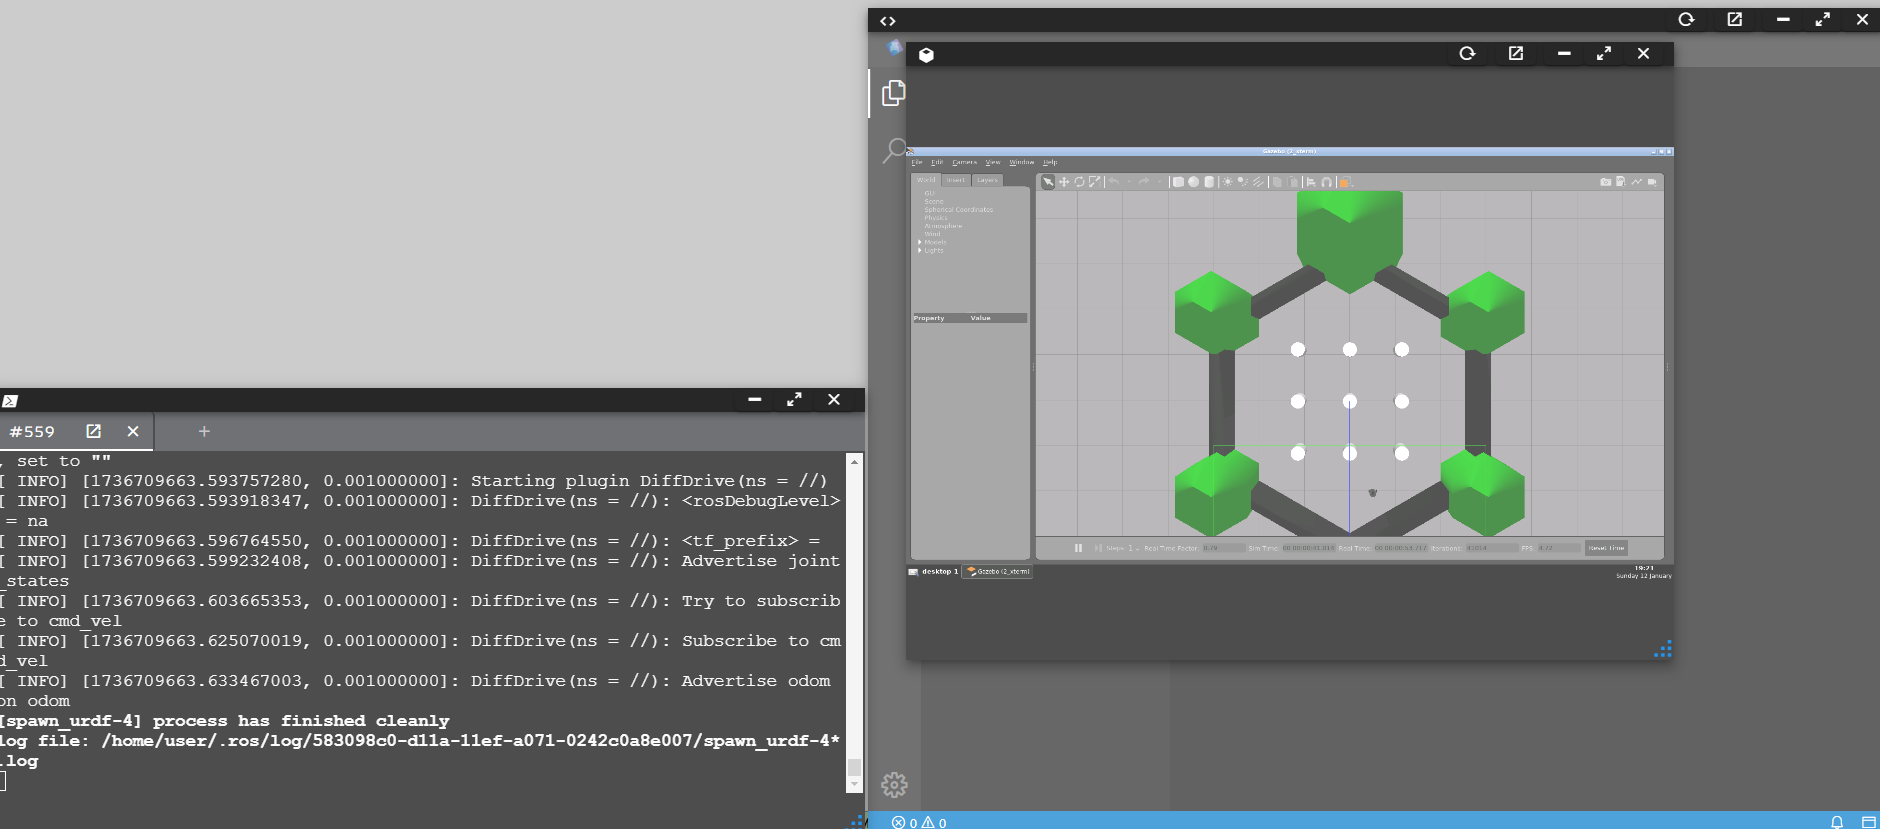


### **3. Working with LaserScan Data**

#### **3.1 Inspect LaserScan Topic**
1. **List Active Topics**:
   ```bash
   $ rostopic list
   ```
   - Look for the LaserScan topic, typically `/scan`.

2. **View Topic Information**:
   ```bash
   $ rostopic info /scan
   ```

3. **Display a Sample Message**:
   ```bash
   $ rostopic echo /scan -n1
   ```
   - This displays one LaserScan message for inspection.

---

#### **3.2 Create a Package to Process LaserScan Data**

1. **Create a New ROS Package**:
   ```bash
   $ cd ~/catkin_ws/src
   $ catkin_create_pkg laser_values rospy sensor_msgs
   ```

  - Explanation:
    - laser_values: The name of the new package you are creating.
    - rospy: Dependency for Python-based ROS programming.
    - sensor_msgs: Dependency for ROS message types related to sensors.

2. **Build the Workspace**:
   ```bash
   $ cd ~/catkin_ws
   $ catkin_make
   ```

3. **Navigate to the Package**:
   ```bash
   $ cd ~/catkin_ws/src/laser_values/src
   ```

4. **Write the Python Script to Process LaserScan Data**:
   - Create `scan.py`:
     ```bash
     $ touch scan.py
     ```

   - Add the following code to `scan.py`:
     ```python
     #!/usr/bin/env python
     import rospy
     from sensor_msgs.msg import LaserScan

     def scan_callback(msg):
         # Log the front distance
         rospy.loginfo("Front distance: %f", msg.ranges[len(msg.ranges)//2])

     def laser_listener():
         rospy.init_node('laser_listener', anonymous=True)
         rospy.Subscriber('/scan', LaserScan, scan_callback)
         rospy.spin()

     if __name__ == '__main__':
         try:
             laser_listener()
         except rospy.ROSInterruptException:
             pass
     ```

5. **Make the Script Executable**:
   ```bash
   $ chmod +x scan.py
   ```

6. **Run the Script**:
   ```bash
   $ rosrun laser_values scan.py
   ```

---



### **4. Moving TurtleBot3 with Python**

#### **4.1 Create a Script to Control the Robot**
1. **Create `move.py`**:
   - Navigate to the `src` folder and create the file:
     ```bash
     $ touch move.py
     ```

2. **Add the Following Code to `move.py`**:
   ```python
   #!/usr/bin/env python
   import rospy
   from geometry_msgs.msg import Twist

   def move_turtlebot3():
       rospy.init_node('move_turtlebot3', anonymous=True)
       cmd_vel_pub = rospy.Publisher('/cmd_vel', Twist, queue_size=10)
       rate = rospy.Rate(10)

       move_cmd = Twist()
       move_cmd.linear.x = 0.2  # Forward speed
       move_cmd.angular.z = 0.0  # No rotation

       while not rospy.is_shutdown():
           cmd_vel_pub.publish(move_cmd)
           rate.sleep()

   if __name__ == '__main__':
       try:
           move_turtlebot3()
       except rospy.ROSInterruptException:
           pass
     ```

3. **Make the Script Executable**:
   ```bash
   $ chmod +x move.py
   ```

4. **Run the Script**:
   ```bash
   $ rosrun laser_values move.py
   ```

---


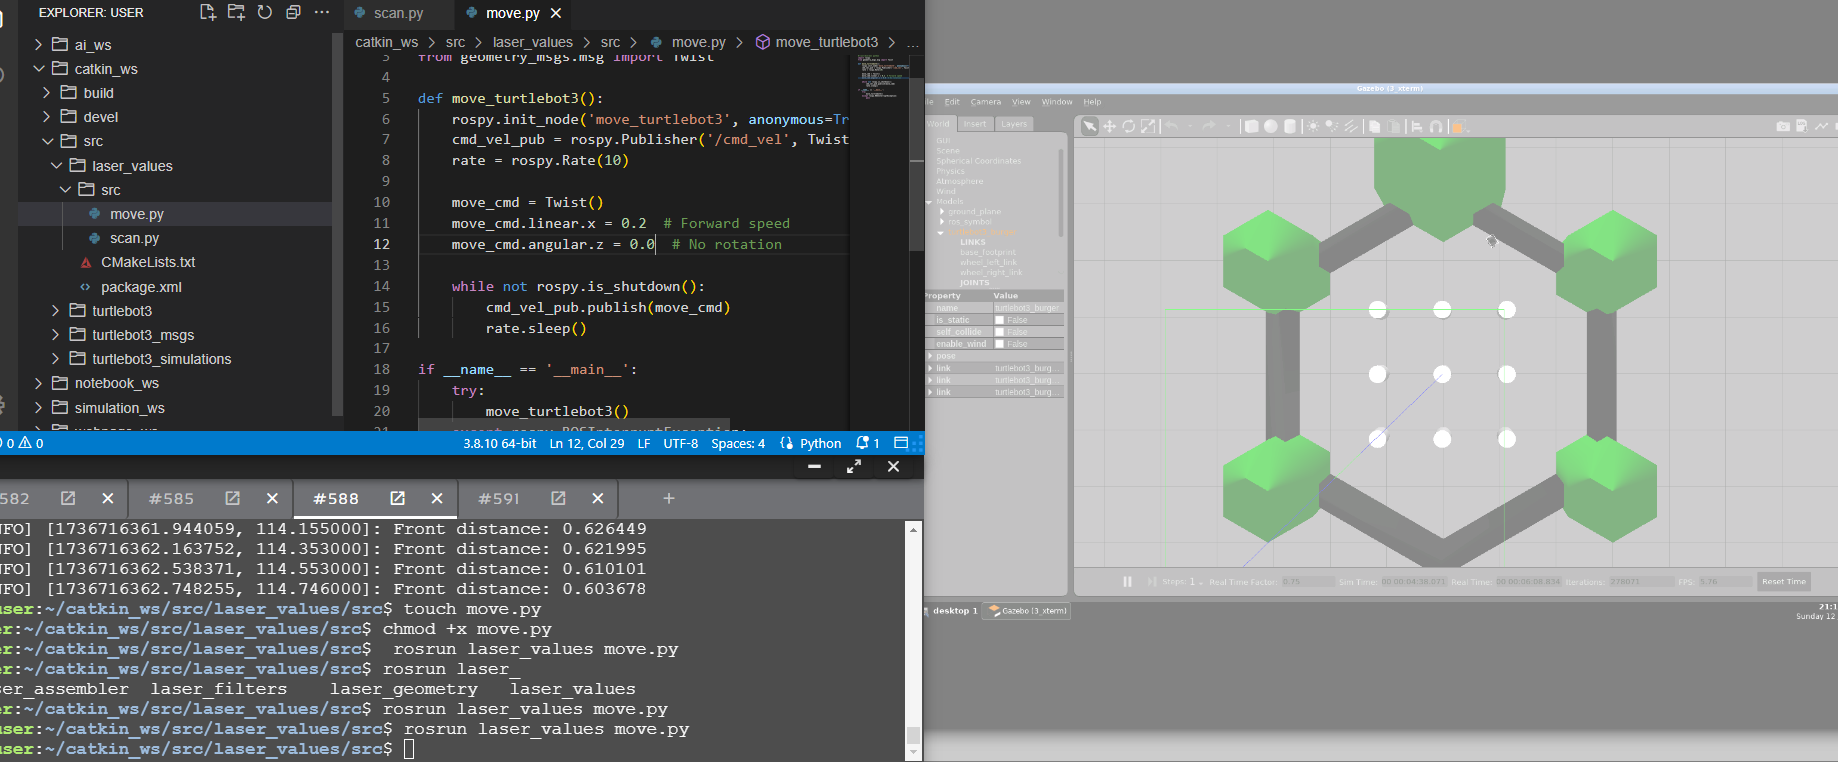

Note:
  - tried with different angular values and linear values
  - negative linear value moves into backward direction


### **5. Obstacle Avoidance with LaserScan and Twist**

#### **5.1 Write a Combined Script**
1. **Create `move_with_avoidance.py`**:
   ```bash
   $ touch move_with_avoidance.py
   ```

2. **Add the Following Code**:
   ```python
   #!/usr/bin/env python
   import rospy
   from geometry_msgs.msg import Twist
   from sensor_msgs.msg import LaserScan

   def scan_callback(msg):
       global obstacle_detected
       front_distance = msg.ranges[len(msg.ranges)//2]
       obstacle_detected = front_distance < 0.5  # Threshold for stopping

   def move_with_avoidance():
       global obstacle_detected
       obstacle_detected = False

       rospy.init_node('move_with_avoidance', anonymous=True)
       cmd_vel_pub = rospy.Publisher('/cmd_vel', Twist, queue_size=10)
       rospy.Subscriber('/scan', LaserScan, scan_callback)
       rate = rospy.Rate(10)

       move_cmd = Twist()

       while not rospy.is_shutdown():
           if obstacle_detected:
               move_cmd.linear.x = 0.0  # Stop
               move_cmd.angular.z = 0.5  # Rotate
           else:
               move_cmd.linear.x = 0.2  # Move forward
               move_cmd.angular.z = 0.0  # No rotation

           cmd_vel_pub.publish(move_cmd)
           rate.sleep()

   if __name__ == '__main__':
       try:
           move_with_avoidance()
       except rospy.ROSInterruptException:
           pass
   ```

3. **Make the Script Executable**:
   ```bash
   $ chmod +x move_with_avoidance.py
   ```

4. **Run the Script**:
   ```bash
   $ rosrun laser_values move_with_avoidance.py
   ```

---

### **6. Observations**
1. The robot moves forward until an obstacle is detected within 0.5 m.
2. Upon detecting an obstacle, the robot stops and turns until the path is clear.

This section ensures that all setup, execution, and testing steps are covered for working with LaserScan data and robot motion. Let me know if you'd like to proceed to the next section!

---
---
---
---

Make a script with name `move_with_avoidancelab5.py` is not being executed as a Python script.

### **1. Code is**

```python
#!/usr/bin/env python
# This line specifies the Python interpreter to be used for executing the script.

import rospy
# Import the rospy library to create ROS nodes, publishers, and subscribers.

import random
# Import the random library to generate random numbers (used for random direction changes).

from sensor_msgs.msg import LaserScan
# Import the LaserScan message type, which provides data from the robot's laser sensor.

from geometry_msgs.msg import Twist
# Import the Twist message type, used for controlling the robot's linear and angular velocities.

def callback(msg):
    # This callback function processes the LaserScan data received from the /scan topic.
    
    print('====================')
    # Separator for better visualization of printed data.

    print('s1 [270]:', msg.ranges[270])  # Right-direction laser beam
    # Print the distance to obstacles detected by the laser sensor at 270° (right direction).

    print('s2 [0]:', msg.ranges[0])      # Front-direction laser beam
    # Print the distance to obstacles directly in front of the robot (0°).

    print('s3 [90]:', msg.ranges[90])    # Left-direction laser beam
    # Print the distance to obstacles detected by the laser sensor at 90° (left direction).

    if msg.ranges[0] > 0.5:
        # Check if the distance to an obstacle directly in front is greater than 0.5 meters.

        # Move forward if no obstacle is detected within 0.5 meters.
        move.linear.x = 0.5  # Set forward speed to 0.5 m/s.
        move.angular.z = 0.0  # No rotation (move straight).
    else:
        # Stop and change direction randomly when an obstacle is encountered.
        move.linear.x = 0.0  # Stop the robot by setting linear velocity to 0.
        move.angular.z = random.uniform(-1.0, 1.0)  
        # Set a random angular velocity between -1.0 and 1.0 radians/sec to turn the robot.

    pub.publish(move)
    # Publish the updated velocity command to the /cmd_vel topic to control the robot's movement.

# Initialize the ROS node
rospy.init_node('random_obstacle_avoidance')
# Create and initialize a ROS node named 'random_obstacle_avoidance'.

# Create a Subscriber to the /scan topic for LaserScan data
sub = rospy.Subscriber('/scan', LaserScan, callback)
# Subscribe to the /scan topic to receive LaserScan messages.
# The callback function will be executed whenever a new LaserScan message is received.

# Create a Publisher to the /cmd_vel topic for robot velocity
pub = rospy.Publisher('/cmd_vel', Twist, queue_size=10)
# Create a publisher that publishes Twist messages to the /cmd_vel topic.
# This topic controls the robot's linear and angular velocities.

# Initialize Twist message
move = Twist()
# Create an instance of the Twist message, which will be used to specify the robot's velocity.

# Keep the node running
rospy.spin()
# Keep the script running and continuously listen for messages on the subscribed topics.

```

---
### **2. Make the Script Executable**
- Run the following command to ensure the script has execution permissions:
  ```bash
  chmod +x move_with_avoidancelab5.py
  ```

---

### **4. Run the Script**
- Use `rosrun` to execute the script:
  ```bash
  rosrun laser_values move_with_avoidancelab5.py
  ```


---
---
---
---